# Applied Machine Learning: Unsupervised Learning

In [17]:
import os
import sys
sys.path.insert(0, os.path.abspath(r'D:\Coursera Data Science\Course 3'))

## Preamble and Datasets

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

## Dimensionality Reduction and Manifold Learning

### Principal Components Analysis (PCA)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


#### Plotting the PCA-transformed version of the breast cancer dataset

<IPython.core.display.Javascript object>


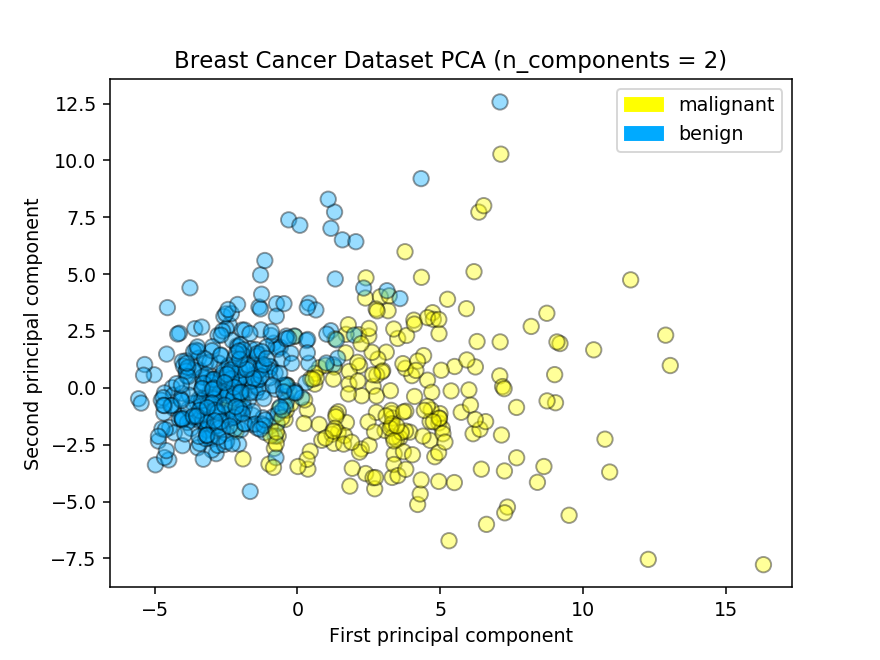

In [4]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

#### Plotting the magnitude of each feature value for the first two principal components

<IPython.core.display.Javascript object>


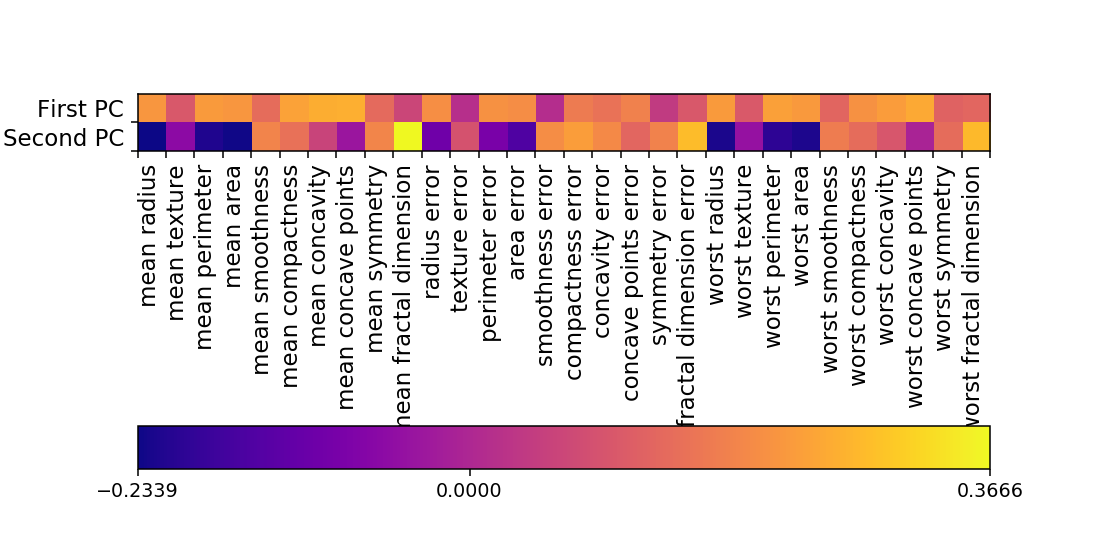

In [5]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

#### PCA on the fruit dataset (for comparison)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

<IPython.core.display.Javascript object>

ValueError: c of shape (59, 1) not acceptable as a color sequence for x with size 59, y with size 59

### Manifold learning methods

#### Multidimensional scaling (MDS) on the fruit dataset

In [7]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

<IPython.core.display.Javascript object>

ValueError: c of shape (59, 1) not acceptable as a color sequence for x with size 59, y with size 59

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE on the fruit dataset

(This example from the lecture video is included so that you can see how some dimensionality reduction methods may be less successful on some datasets. Here, it doesn't work as well at finding structure in the small fruits dataset, compared to other methods like MDS.)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

In [ ]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## Clustering

### K-means

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

<IPython.core.display.Javascript object>


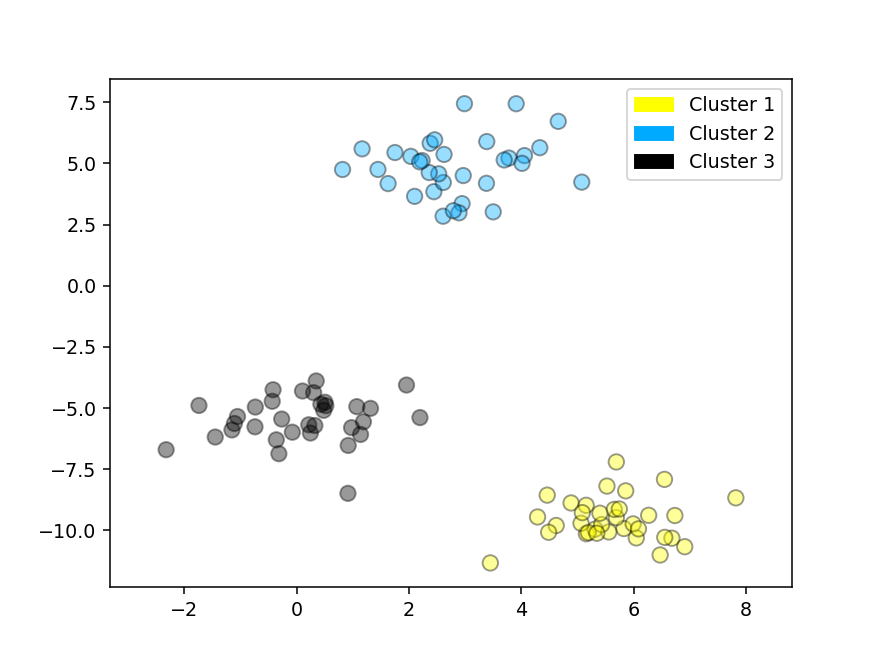

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

### Agglomerative clustering

<IPython.core.display.Javascript object>


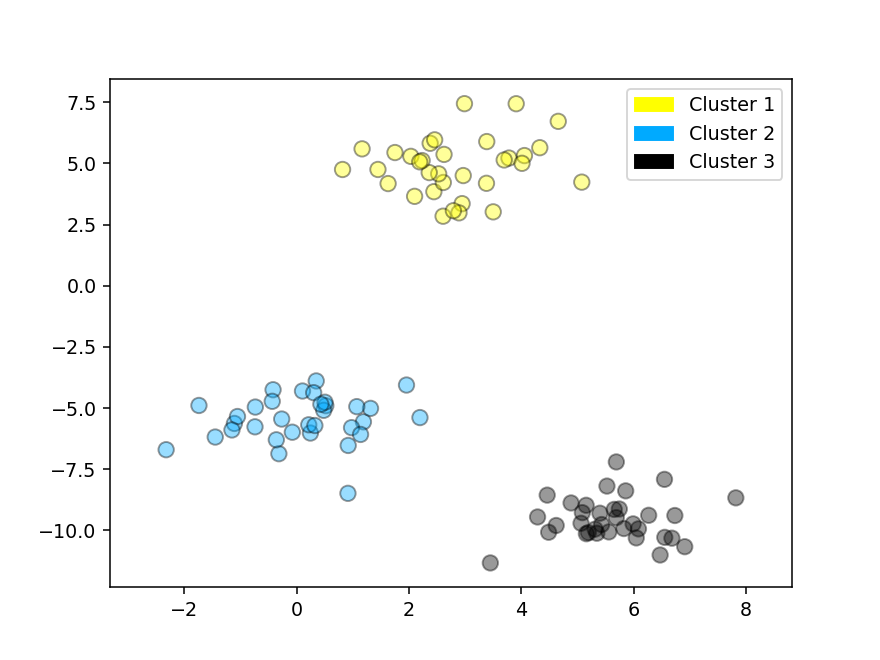

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Creating a dendrogram (using scipy)

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


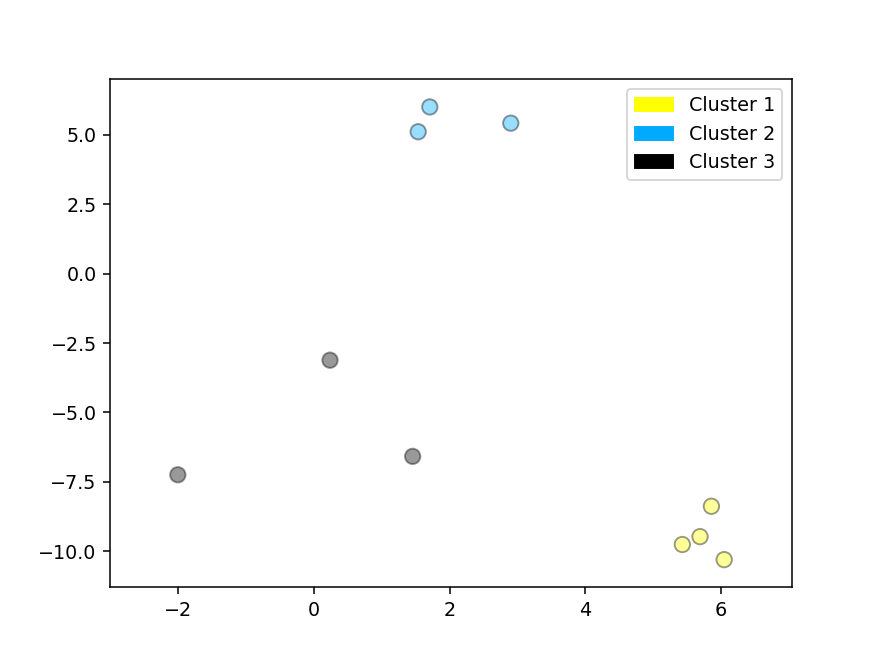

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [20]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

In [21]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

<IPython.core.display.Javascript object>

### DBSCAN clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

# Clustering Explaination

Aside from transformations, the other family of unsupervised learning methods are the clustering methods.
Start transcript at 16 seconds0:16
The goal of clustering is to find a way to divide up a data set into groups called clusters. So that groups with similar data instances are assigned to the same cluster, while very dissimilar objects are assigned to different clusters.
Start transcript at 31 seconds0:31
If new data points were being added over time, some clustering algorithms could also predict which cluster a new data instance should be assigned to. Similar to classification, but without being able to train the clustering model using label examples in advanced.
Start transcript at 48 seconds0:48
One of the most widely used clustering algorithms is called k-means clustering. K-means clustering finds k cluster centers in different regions of the feature space that it thinks represent very different groups.
Start transcript at 1 minute 2 seconds1:02
You need to specify the value of k ahead of time, which is one of the draw backs of k-means. For some problems, we may know the number of classes the data should fall into, but for many other tasks, we might not. K-means operates by first randomly picking locations for the k-cluster centers.
Start transcript at 1 minute 21 seconds1:21
Then it goes back and forth between two steps.
Start transcript at 1 minute 24 seconds1:24
In the first step, given the locations of existing cluster centers, it assigns each data point to a cluster center based on its distance from the center.
Start transcript at 1 minute 35 seconds1:35
In other words, it assigns each data point to the closest center.
Start transcript at 1 minute 39 seconds1:39
Then in the second step, it adjusts the locations of each cluster center.
Start transcript at 1 minute 43 seconds1:43
It does this by setting the new cluster center to the mean of the positions of all the data points in that cluster.
Start transcript at 1 minute 51 seconds1:51
Somewhat magically, after running this alternating process for a while, coherent clusters do start to form. And the cluster centers and the corresponding cluster assignment for each data point eventually settled down to something stable.
Start transcript at 2 minutes 6 seconds2:06
Now one aspect of k means is that different random starting points for the cluster centers often result in very different clustering solutions. So typically, the k-means algorithm is run in scikit-learn with ten different random initializations. And the solution occurring the most number of times is chosen. Here is a step by step example.
Start transcript at 2 minutes 28 seconds2:28
We first choose three locations in the space randomly to be the cluster centers.
Start transcript at 2 minutes 35 seconds2:35
Then we assign each data point to the cluster with the nearest center.
Start transcript at 2 minutes 40 seconds2:40
Now for each cluster, we compute the mean location of all points in the cluster and use that as the new cluster center for the next iteration.
Start transcript at 2 minutes 49 seconds2:49
Here's the second iteration of the first and second steps.
Start transcript at 2 minutes 54 seconds2:54
Eventually, after 20 or 50 or 100 steps, things settle down to converge on one solution, as shown here.
Start transcript at 3 minutes 5 seconds3:05
K-means clustering is simple to apply in scikit learning.
Start transcript at 3 minutes 12 seconds3:12
You import the k-means class from sklearn cluster create the k-means object set into value of k by specifying the n cluster parameter, and then calling the fit method on the dataset to run the algorithm.
Start transcript at 3 minutes 28 seconds3:28
One distinction should be made here between clustering algorithms that can predict which center new data points should be assigned to, and those that cannot make such predictions. K-means supports the predict method, and so we can call the fit and predict methods separately.
Start transcript at 3 minutes 44 seconds3:44
Later methods we'll look at like agglomerative clustering do not and must perform the fit and predict in a single step, as we'll see.
Start transcript at 3 minutes 53 seconds3:53
Here's the output from the notebook code showing the result supplied to the fruits dataset, where we know the value of k ahead of time. Note that kmeans is very sensitive to the range of future values. So if your data has features with very different ranges, it's important to normalize using min-max scaling, as we did for some supervised learning methods.
Start transcript at 4 minutes 17 seconds4:17
Because each cluster in k-means clustering is defined entirely by its center point, it can only capture fairly simple types of clusters. K-means clustering tends to work well when the data points form into groups of roughly the same size, with simple globular shapes that are well-separated. K-means will tend not to do well if the data forms long, irregular clusters, for example.
Start transcript at 4 minutes 43 seconds4:43
Also the version k-means we saw here assumed that the data features were continuous values. However, in some cases we may have categorical features, where taking the mean doesn't make sense.
Start transcript at 4 minutes 54 seconds4:54
In that case, there are variants of k-means that can use a more general definition of distance.
Start transcript at 5 minutes 0 seconds5:00
Such as the k-medoids algorithm that can work with categorical features.
Start transcript at 5 minutes 7 seconds5:07
A glommer of clustering refers to a family of clustering methods that work by doing an iterative bottom up approach.
Start transcript at 5 minutes 14 seconds5:14
First, each data point is put into its own cluster of one item.
Start transcript at 5 minutes 19 seconds5:19
Then, a sequence of clusterings are done where the most similar two clusters at each stage are merged into a new cluster. Then, this process is repeated until some stopping condition is met. In scikit-learn, the stopping condition is the number of clusters.
Start transcript at 5 minutes 34 seconds5:34
Here's a visual example of how agglomerative clustering might proceed on a sample dataset until three clusters are reached.
Start transcript at 5 minutes 42 seconds5:42
In Stage 1, each data point is in its own cluster, shown by the circles around the points. In Stage 2, the two most similar clusters, which at this stage amounts to defining the closest points are merged. And this process is continued, as denoted by the expanding and closed regions that denote each cluster.
Start transcript at 6 minutes 4 seconds6:04
You can choose how the agglomerative clustering algorithm determines the most similar cluster by specifying one of several possible linkage criteria.
Start transcript at 6 minutes 14 seconds6:14
In scikit-learn, the following three linkage criteria are available, ward, average, and complete.
Start transcript at 6 minutes 23 seconds6:23
Ward's method chooses to merge the two clusters that give the smallest increase in total variance within all clusters.
Start transcript at 6 minutes 31 seconds6:31
Average linkage merges the two clusters that have the smallest average distance between points.
Start transcript at 6 minutes 38 seconds6:38
Complete linkage, which is also known as maximum linkage, merges the two clusters that have the smallest maximum distance between their points.
Start transcript at 6 minutes 47 seconds6:47
In general, Ward's method works well on most data sets, and that's our usual method of choice.
Start transcript at 6 minutes 53 seconds6:53
In some cases, if you expect the sizes of the clusters to be very different, for example, that one cluster is much larger than the rest. It's worth trying average and complete linkage criteria as well.
Start transcript at 7 minutes 7 seconds7:07
To perform agglomerative clustering in scikit-learn, you import the agglomerative clustering class from sklearn cluster.
Start transcript at 7 minutes 15 seconds7:15
When initializing the object, you specify the n clusters parameter that causes the algorithm to stop when it has reach that number of clusters.
Start transcript at 7 minutes 24 seconds7:24
You call the fit predict method using the data set as input and they return the set of cluster assignments for the data points as shown here.
Start transcript at 7 minutes 34 seconds7:34
One of the nice things about agglomerative clustering is that it automatically arranges the data into a hierarchy as an effect of the algorithm, reflecting the order and cluster distance at which each data point is assigned to successive clusters.
Start transcript at 7 minutes 49 seconds7:49
This hierarchy can be useful to visualize using what's called a dendrogram, which can be used even with higher dimensional data.
Start transcript at 7 minutes 56 seconds7:56
Here's the dendogram corresponding to the Ward's method clustering of the previous data set example.
Start transcript at 8 minutes 3 seconds8:03
The data points are at the bottom and are numbered. The y axis represents cluster distance, namely, the distance that two clusters are apart in the data space.
Start transcript at 8 minutes 13 seconds8:13
The data points form the leaves of the tree at the bottom, and the new node parent in the tree is added as each pair of successive clusters is merged.
Start transcript at 8 minutes 23 seconds8:23
The height of the node parent along the y axis captures how far apart the two clusters were when they merged, with the branch going up representing the new merged cluster.
Start transcript at 8 minutes 34 seconds8:34
Note that you can tell how far apart the merged clusters are by the length of each branch of the tree.
Start transcript at 8 minutes 41 seconds8:41
This property of a dendogram can help us figure out the right number of clusters. In general, we want clusters that have highly similar items within each cluster, but that are far apart from other clusters. For example, we can see that going from three clusters to two happens at a fairly high Y value. Which means the clusters that were merged were a significant distance apart.
Start transcript at 9 minutes 4 seconds9:04
We might want to avoid choosing two clusters and stick with three clusters that don't involve forcing a merge for clusters that have very dissimilar items in them.
Start transcript at 9 minutes 13 seconds9:13
Scikit-learn doesn't provide the ability to plot dendrograms, but SciPy does. SciPy handles clustering a little differently than scikit-learn, but here is an example.
Start transcript at 9 minutes 24 seconds9:24
We first import the dendrogram in word functions from the scipy.cluster hierarchy module. The word function returns an array that specifies the distances spanned during the agglomerative clustering. This word function returns a linkage array, which can then be passed to the dendogram function to plot the tree.
Start transcript at 9 minutes 47 seconds9:47
Typically, making use of this hierarchy is most useful when the underlying data itself follows some kind of hierarchical process so the tree is easily interpreted. For example, hierarchical clustering is especially useful for genetic and other biological data where the levels represent stages of mutation or evolution.
Start transcript at 10 minutes 8 seconds10:08
But there are other data sets where both k-means clustering and agglomerative clustering don't perform well.
Start transcript at 10 minutes 14 seconds10:14
So we're now going to give an overview of a third clustering method called DBSCAN.
Start transcript at 10 minutes 21 seconds10:21
DBSCAN is an acronym that stands for density-based spatial clustering of applications with noise.
Start transcript at 10 minutes 29 seconds10:29
One advantage of DBSCAN is that you don't need to specify the number of clusters in advance.
Start transcript at 10 minutes 35 seconds10:35
Another advantage is that it works well with datasets that have more complex cluster shapes.
Start transcript at 10 minutes 40 seconds10:40
It can also find points that are outliers that shouldn't reasonably be assigned to any cluster. DBSCAN is relatively efficient and can be used for large datasets. The main idea behind DBSCAN is that clusters represent areas in the dataspace that are more dense with data points, while being separated by regions that are empty or at least much less densely populated.
Start transcript at 11 minutes 4 seconds11:04
The two main parameters for DBSCAN are min samples and eps.
Start transcript at 11 minutes 9 seconds11:09
All points that lie in a more dense region are called core samples.
Start transcript at 11 minutes 14 seconds11:14
For a given data point, if there are min sample of other data points that lie within a distance of eps, that given data points is labeled as a core sample.
Start transcript at 11 minutes 24 seconds11:24
Then, all core samples that are with a distance of eps units apart are put into the same cluster.
Start transcript at 11 minutes 33 seconds11:33
In addition to points being categorized as core samples, points that don't end up belonging to any cluster are considered as noise. While points that are within a distance of eps units from core points, but not core points themselves, are termed boundary points.
Start transcript at 11 minutes 52 seconds11:52
Here's an example of DBSCAN applied to a sample data set.
Start transcript at 11 minutes 57 seconds11:57
As with the other clustering methods, DBSCAN is imported from the Scikit-Learn cluster module.
Start transcript at 12 minutes 3 seconds12:03
And just like with a agglomerative clustering, DBSCAN doesn't make cluster assignments from new data. So we use the fit predict method to cluster and get the cluster assignments back in one step.
Start transcript at 12 minutes 16 seconds12:16
One consequence of not having the right settings of eps and min samples for your particular dataset might be that the cluster memberships returned by DBSCAN may all be assigned the label -1, which indicates noise.
Start transcript at 12 minutes 31 seconds12:31
Basically, the EPS setting does implicitly control the number of clusters that are found.
Start transcript at 12 minutes 37 seconds12:37
With DBSCAN, if you've scaled your data using a standard scalar or min-max scalar to make sure the feature values have comparable ranges, finding an appropriate value for eps is a bit easer to do.
Start transcript at 12 minutes 51 seconds12:51
One final note, make sure that when you use the cluster assignments from DBSCAN, you check for and handle the -1 noise value appropriately. Since this negative value might cause problems, for example, if the cluster assignment is used as an index into another array later on.
Start transcript at 13 minutes 8 seconds13:08
Unlike supervised learning, where we have existing labels or target values to use for evaluating the effectiveness of the learning method, it can be difficult to evaluate unsupervised learning algorithms automatically. Since there's typically no ground truth to compare against.
Start transcript at 13 minutes 24 seconds13:24
In some cases, as in the breast cancer example, we may have existing labels that can be used to evaluate the quality of the clusters by comparing the assignment of a data point to a cluster with the label assigned to the same data point.
Start transcript at 13 minutes 37 seconds13:37
But there are many cases where labels are not available. In addition, in the case of clustering, for example, there's ambiguity, in a sense that there are typically multiple clusterings that could be plausibly assigned to a given data set. And none of them is obviously better than another unless we have some additional criteria. Such as, performance on the specific application task that does have an objective evaluation to use as a basis for comparison.
Start transcript at 14 minutes 4 seconds14:04
For example, in cases where the results of the clustering are used as features for supervised learning, we could use the overall classifier accuracy gain from adding these clustering-based features as a measure of success for the underlying clustering.
Start transcript at 14 minutes 19 seconds14:19
Another issue with evaluating clustering algorithms is that it can be hard to automatically interpret or label the meaning of the clusters that are found. And this is still a step that requires human expertise to judge.